## GridSearchCV的使用

In [1]:
# -*- coding: utf-8 -*-
# 使用RandomForest 对IRIS 数据集进行分类
# 利用 GridSearchCV寻找最优参数
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
rf = RandomForestClassifier()
parameters = {"n_estimators":range(1,11)}
iris = load_iris()
# 使用 GridSearchCV 进行参数调优
clf = GridSearchCV(estimator=rf,param_grid = parameters)
# 对 iris 数据集进行分类
clf.fit(iris.data,iris.target)
print("最优分数：%.4lf" %clf.best_score_)
print("最优参数：",clf.best_params_)

/Users/wh-js/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


最优分数：0.9667
最优参数： {'n_estimators': 6}


In [5]:
# 导入相关库
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
rf = RandomForestClassifier()
parameters = {"randomforestclassifier__n_estimators": range(1,11)} 
iris = load_iris()
pipeline = Pipeline([
        ('scaler',StandardScaler()),
        ('randomforestclassifier',rf)
])
clf = GridSearchCV(estimator=pipeline,param_grid=parameters)
clf.fit(iris.data,iris.target)
print("最优结果是：",clf.best_score_)
print("最优结果的参数是：",clf.best_params_)

最优结果是： 0.9666666666666667
最优结果的参数是： {'randomforestclassifier__n_estimators': 3}


## 数据准备阶段

In [4]:
# -*- coding: utf-8 -*-
from sklearn.model_selection import GridSearchCV,train_test_split,learning_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline

In [5]:
data = pd.read_csv('./credit_default-master/UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [6]:
data.shape

(30000, 25)

In [7]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [9]:
# 查看下个雨违约率的情况
next_month = data['default.payment.next.month'].value_counts()
print(next_month)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


/Users/wh-js/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/wh-js/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/wh-js/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/wh-js/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/wh-js/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: fin

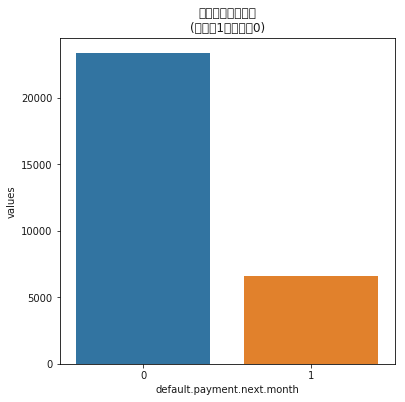

In [10]:
df = pd.DataFrame({'default.payment.next.month':next_month.index,'values':next_month.values})
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
plt.figure(figsize=(6,6))
plt.title('信用卡违约率客户\n(违约：1，守约：0)')
sns.set_color_codes('pastel')
sns.barplot(x='default.payment.next.month',y='values',data=df)
locs,labels = plt.xticks()
plt.show()

In [11]:
# 特征选择，去掉 ID 字段，最后一个结果字段即可
data.drop(['ID'],inplace=True,axis = 1)
target = data['default.payment.next.month'].values
columns = data.columns.tolist()
columns.remove('default.payment.next.month')
features = data[columns].values

In [16]:
# 取30% 作为测试集，70%的数据作为训练集
train_x,test_x,train_y,test_y = train_test_split(features,target,test_size = 0.3,stratify = target,random_state = 1)

In [25]:
# 构造各种分类器
classifiers = [
    SVC(random_state=1,kernel='rbf'),
    DecisionTreeClassifier(random_state=1,criterion='gini'),
    RandomForestClassifier(random_state=1,criterion='gini'),
    KNeighborsClassifier(metric='minkowski'),
]
# 分类器名称
classifier_names = [
            'svc',
            'decisiontreeclassifier',
            # 'randomforestclassfier',
            'randomforestclassifier',
            'kneighborsclassifier',
]

# 分类器参数
classifier_param_grid = [
            {'svc__C':[1],'svc__gamma':[0.01]},
            {'decisiontreeclassifier__max_depth':[6,9,11]},
            {'randomforestclassifier__n_estimators':[3,5,6]},
            {'kneighborsclassifier__n_neighbors':[4,6,8]}
]

In [26]:
# 对具体的分类器进行 GridSearchCV 参数调优
def GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,param_grid,score = 'accuracy'):
    response = {}
    gridsearch = GridSearchCV(estimator=pipeline,param_grid=param_grid,scoring=score)
    # 寻找最优的参数和最优的准确率分数
    search = gridsearch.fit(train_x,train_y)
    print("GridSearchCV 最优参数：",search.best_params_)
    print("GridSearchCV 最优分数：%0.4f" %search.best_score_)
    predict_y = search.predict(test_x)
    print("准确率是：%0.4f" %accuracy_score(test_y,predict_y))
    response["predict_y"] = predict_y
    response['accuracy_score'] = accuracy_score(test_y,predict_y)
    return response

for model,model_name,model_grid_param in zip(classifiers,classifier_names,classifier_param_grid):
    pipeline = Pipeline([
        ('scaler',StandardScaler()),
        (model_name,model)
    ])
    result = GridSearchCV_work(pipeline,train_x,train_y,test_x,test_y,model_grid_param,score='accuracy')

GridSearchCV 最优参数： {'svc__C': 1, 'svc__gamma': 0.01}
GridSearchCV 最优分数：0.8174
准确率是：0.8172
GridSearchCV 最优参数： {'decisiontreeclassifier__max_depth': 6}
GridSearchCV 最优分数：0.8186
准确率是：0.8113
GridSearchCV 最优参数： {'randomforestclassifier__n_estimators': 6}
GridSearchCV 最优分数：0.8000
准确率是：0.7997
GridSearchCV 最优参数： {'kneighborsclassifier__n_neighbors': 8}
GridSearchCV 最优分数：0.8040
准确率是：0.8036


In [ ]:
## 极客时间作业

## 用 adaboost 以及 GriSearchCV 来提升参数性能

In [1]:
# -*- coding: utf-8 -*-
# 导入相关库
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
import pandas as pd
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

### 加载数据

In [2]:
data = pd.read_csv('./credit_default-master/UCI_Credit_Card.csv')
data.shape

(30000, 25)

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
# 查看下一个月违约的情况
df = data['default.payment.next.month'].value_counts()
print(df)

0    23364
1     6636
Name: default.payment.next.month, dtype: int64


### 可视化探索数据

In [17]:
# 查看客户违约率的情况
df_default_payment_next_month = pd.DataFrame({'default_payment_next_month':df.index,'values':df.values})
df_default_payment_next_month

,default_payment_next_month,values
0,0,23364
1,1,6636


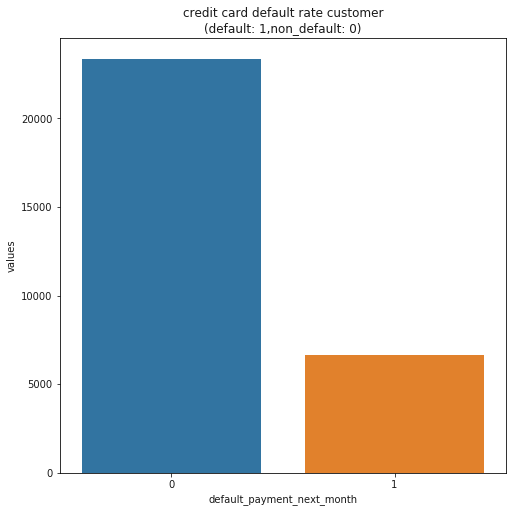

In [18]:
plt.figure(figsize=(8,8))
plt.title('credit card default rate customer\n(default: 1,non_default: 0)')
sns.set_color_codes('pastel')
sns.barplot('default_payment_next_month','values',data = df_default_payment_next_month)
locs,labels = plt.xticks() # 得到图的标签刻度和标签的内容
plt.show()

In [19]:
?plt.xticks

## 分类阶段

### 特征选择

In [10]:
# 去掉第一列的 ID ,以及最后一列的 default.payment.next.month数据
df_analysis = data.drop(['ID'],axis = 1)
target = df_analysis['default.payment.next.month'].values
columns = df_analysis.columns.tolist()
columns.remove('default.payment.next.month')
features = df_analysis[columns].values

In [11]:
target

array([1, 1, 0, ..., 1, 1, 1])

In [12]:
features

array([[2.0000e+04, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2000e+05, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [9.0000e+04, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [3.0000e+04, 1.0000e+00, 2.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [8.0000e+04, 1.0000e+00, 3.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [5.0000e+04, 1.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

### 创建 adaboost 模型

In [14]:
# 30%的数据作为测试集，其余作为训练集
train_x,test_x,train_y,test_y = train_test_split(features,target,test_size = 0.3,stratify = target,random_state = 2)
# 创建 adaboost 模型
# 创建管道机制
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('ada',AdaBoostClassifier())
])
params_grid = {'ada__n_estimators':[10,50,100]}
# 模型创建以及参数优化
ada = GridSearchCV(estimator=pipeline,param_grid=params_grid)
ada.fit(train_x,train_y)
print("adaboost 最优结果是：",ada.best_score_)
print("adaboost 最优参数是：",ada.best_params_)
predict_y = ada.predict(test_x)
print("adaboost 的准确率是：",accuracy_score(test_y,predict_y))

adaboost 最优结果是： 0.816952380952381
adaboost 最优参数是： {'ada__n_estimators': 50}
adaboost 的准确率是： 0.8162222222222222


In [16]:
# 30%的数据作为测试集，其余作为训练集
train_x,test_x,train_y,test_y = train_test_split(features,target,test_size = 0.3,stratify = target,random_state = 1)
# 创建 adaboost 模型
# 创建管道机制
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('ada',AdaBoostClassifier())
])
params_grid = {'ada__n_estimators':[10,50,100]}
# 模型创建以及参数优化
ada = GridSearchCV(estimator=pipeline,param_grid=params_grid,scoring='accuracy')
ada.fit(train_x,train_y)
print("adaboost 最优结果是：",ada.best_score_)
print("adaboost 最优参数是：",ada.best_params_)
predict_y = ada.predict(test_x)
print("adaboost 的准确率是：",accuracy_score(test_y,predict_y))

adaboost 最优结果是： 0.8186666666666667
adaboost 最优参数是： {'ada__n_estimators': 10}
adaboost 的准确率是： 0.8128888888888889
